In [1]:
import pandas as pd

import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns 

sns.set(color_codes = True)

import statistics as stats

%matplotlib inline

from scipy.stats import binom

from scipy.stats import poisson

from scipy.stats import norm

import scipy.stats as ss

In [2]:
pip install emoji


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install genderize


Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install gender-guesser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
f = pd.read_csv("file2793.csv")

In [4]:
f.head()

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id
0,Cássio Trajano,FIVE,(Translated by Google) I'm there every beginni...,2019-01-29T16:49:28.556676Z,2019-01-29T16:49:28.556676Z,Cássio Trajano,ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB
1,Danielle cristine faria de oliveira,FIVE,(Translated by Google) Very beautiful and plea...,2019-01-28T14:40:59.180127Z,2019-01-28T14:40:59.180127Z,Danielle cristine faria de oliveira,ChdDSUhNMG9nS0VJQ0FnSURJbjdMczlRRRAB
2,Arthursousa Vieira,FIVE,(Translated by Google) One of the best canping...,2019-01-28T02:05:47.566036Z,2019-01-28T02:05:47.566036Z,Arthursousa Vieira,ChZDSUhNMG9nS0VJQ0FnSURJcjYtZGFREAE
3,EVANDERSON ALEXANDRE,FIVE,(Translated by Google) Family place but I foun...,2019-01-28T00:56:38.167475Z,2019-01-28T00:56:38.167475Z,EVANDERSON ALEXANDRE,ChZDSUhNMG9nS0VJQ0FnSURJcjl2eVBnEAE
4,Richard Xavier,FIVE,(Translated by Google) Great place! Affordable...,2019-01-27T20:42:17.239839Z,2019-01-27T20:43:28.501122Z,Richard Xavier,ChdDSUhNMG9nS0VJQ0FnSURJcl9iMDV3RRAB


In [5]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   displayName    2793 non-null   object
 1   starRating     2793 non-null   object
 2   comment        1648 non-null   object
 3   createTime     2793 non-null   object
 4   updateTime     2793 non-null   object
 5   reviewer_name  2793 non-null   object
 6   review_id      2793 non-null   object
dtypes: object(7)
memory usage: 152.9+ KB


import pandas as pd

# Your DataFrame with a 'comment' column
data = f["comment"]
df = pd.DataFrame(data)

# Extract the text before and after "(Original)"
split_df = df['comment'].str.split('(Original)', expand=True, n=1)
df['before_original'] = split_df[0]
df['after_original'] = split_df[1]

# Display the DataFrame with new columns
print(df[['comment', 'before_original', 'after_original']])


df["before_original"]

df["before_original"].loc[3]

df["before_original"].loc[30]

df["after_original"].loc[30]

text_before_original = df["before_original"].loc[30]
print(text_before_original)


text_before_original = df["before_original"].loc[60]
print(text_before_original)


f["comment"].loc[60]

f["comment"].loc[3]

In [6]:
f["starRating"].unique()

array(['FIVE', 'THREE', 'FOUR', 'TWO', 'ONE'], dtype=object)

In [7]:
f["starRating"].replace('ONE', 1, inplace = True)
f["starRating"].replace('TWO', 2, inplace = True)
f["starRating"].replace('THREE', 3, inplace = True)
f["starRating"].replace('FOUR', 4, inplace = True)
f["starRating"].replace('FIVE', 5, inplace = True)

In [8]:
import pandas as pd

# Assuming your DataFrame is named 'f' with a 'comment' column
f['comment'] = f['comment'].astype(str)  # Ensure the 'comment' column is of string type

# Extract the text before and after "(Original)"
split_df = f['comment'].str.split('(Original)', expand=True, n=1)
f['before_original'] = split_df[0]
f['after_original'] = split_df[1]

# Display the DataFrame with new columns
#print(f[['comment', 'before_original', 'after_original']])


In [9]:
f.tail()

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original
2788,Reinaldo Soares da Silva,5,nan,2018-01-22T21:10:06.355Z,2018-01-22T21:10:06.355Z,Reinaldo Soares da Silva,ChZDSUhNMG9nS0VJQ0FnSURBbGYtM0pBEAE,nan,None
2789,Fael Faul,5,(Translated by Google) Too good\n\n(Original)\...,2018-01-21T21:24:40.996Z,2018-01-21T21:24:40.996Z,Fael Faul,ChdDSUhNMG9nS0VJQ0FnSUNRLTU3UjNnRRAB,(Translated by Google) Too good\n\n(,Original
2790,Eliana Azevedo,5,nan,2018-01-20T21:07:19.716Z,2018-01-20T21:07:19.716Z,Eliana Azevedo,ChdDSUhNMG9nS0VJQ0FnSUNnNnR5RnNnRRAB,nan,None
2791,Silvia Aquino,5,nan,2018-01-20T18:15:38.871Z,2018-01-20T18:15:38.871Z,Silvia Aquino,ChZDSUhNMG9nS0VJQ0FnSURBbHNEdUt3EAE,nan,None
2792,Marcelo o empreendedor,5,(Translated by Google) The group played paintb...,2018-01-20T15:32:53.260Z,2018-01-20T15:34:48.062Z,Marcelo o empreendedor,ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB,(Translated by Google) The group played paintb...,Original


In [10]:
import pandas as pd

# Assuming you have a DataFrame named 'f' with a column named 'comment'
# Replace the sample data with your actual DataFrame

# Function to clean the text
def clean_text(text):
    if pd.notna(text):  # Check for NaN values
        # Remove "(Translated by Google)"
        text = text.replace('(Translated by Google)', '')

        # Remove "\n\n(Original)\n"
        text = text.replace('\n\n(Original)\n', '')
        
        # Remove "\n\n(Original)\n"
        text = text.replace('\n\n', '')
        
        # Remove "\n\n(Original)\n"
        text = text.replace('(', '')

        # Remove "\" 
        text = text.replace('\\', '')

        return text.strip()  # Remove leading and trailing whitespaces
    else:
        return text  # Return NaN if the input is NaN

# Apply the cleaning function to each row in the 'comment' column
f['cleaned_text'] = f['before_original'].apply(clean_text)



In [11]:
f.head()

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text
0,Cássio Trajano,5,(Translated by Google) I'm there every beginni...,2019-01-29T16:49:28.556676Z,2019-01-29T16:49:28.556676Z,Cássio Trajano,ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB,(Translated by Google) I'm there every beginni...,Original,I'm there every beginning of the year I highly...
1,Danielle cristine faria de oliveira,5,(Translated by Google) Very beautiful and plea...,2019-01-28T14:40:59.180127Z,2019-01-28T14:40:59.180127Z,Danielle cristine faria de oliveira,ChdDSUhNMG9nS0VJQ0FnSURJbjdMczlRRRAB,(Translated by Google) Very beautiful and plea...,Original,Very beautiful and pleasant place. Breakfast a...
2,Arthursousa Vieira,5,(Translated by Google) One of the best canping...,2019-01-28T02:05:47.566036Z,2019-01-28T02:05:47.566036Z,Arthursousa Vieira,ChZDSUhNMG9nS0VJQ0FnSURJcjYtZGFREAE,(Translated by Google) One of the best canping...,Original,One of the best canpings in the region
3,EVANDERSON ALEXANDRE,5,(Translated by Google) Family place but I foun...,2019-01-28T00:56:38.167475Z,2019-01-28T00:56:38.167475Z,EVANDERSON ALEXANDRE,ChZDSUhNMG9nS0VJQ0FnSURJcjl2eVBnEAE,(Translated by Google) Family place but I foun...,Original,Family place but I found things on site expens...
4,Richard Xavier,5,(Translated by Google) Great place! Affordable...,2019-01-27T20:42:17.239839Z,2019-01-27T20:43:28.501122Z,Richard Xavier,ChdDSUhNMG9nS0VJQ0FnSURJcl9iMDV3RRAB,(Translated by Google) Great place! Affordable...,Original,Great place! Affordable price and that's where...


In [12]:
f["cleaned_text"].iloc[1]

'Very beautiful and pleasant place. Breakfast and lunch have a lot of variety and are delicious.'

In [13]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   displayName      2793 non-null   object
 1   starRating       2793 non-null   int64 
 2   comment          2793 non-null   object
 3   createTime       2793 non-null   object
 4   updateTime       2793 non-null   object
 5   reviewer_name    2793 non-null   object
 6   review_id        2793 non-null   object
 7   before_original  2793 non-null   object
 8   after_original   1613 non-null   object
 9   cleaned_text     2793 non-null   object
dtypes: int64(1), object(9)
memory usage: 218.3+ KB


In [14]:
from textblob import TextBlob

# Assuming you have a DataFrame df with a column named 'cleaned_text'
mixed_language_text = f["cleaned_text"].str.cat(sep=' ')

blob = TextBlob(mixed_language_text)
sentiment = blob.sentiment

print(f"Sentiment: {sentiment.polarity}")


Sentiment: 0.4301541314931242


In [15]:
# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity

# Add a new column 'Sentiment_Score' to the DataFrame
f['Sentiment_Score'] = f["cleaned_text"].apply(analyze_sentiment)

In [16]:
f.tail()

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Sentiment_Score
2788,Reinaldo Soares da Silva,5,nan,2018-01-22T21:10:06.355Z,2018-01-22T21:10:06.355Z,Reinaldo Soares da Silva,ChZDSUhNMG9nS0VJQ0FnSURBbGYtM0pBEAE,nan,None,nan,0.0
2789,Fael Faul,5,(Translated by Google) Too good\n\n(Original)\...,2018-01-21T21:24:40.996Z,2018-01-21T21:24:40.996Z,Fael Faul,ChdDSUhNMG9nS0VJQ0FnSUNRLTU3UjNnRRAB,(Translated by Google) Too good\n\n(,Original,Too good,0.7
2790,Eliana Azevedo,5,nan,2018-01-20T21:07:19.716Z,2018-01-20T21:07:19.716Z,Eliana Azevedo,ChdDSUhNMG9nS0VJQ0FnSUNnNnR5RnNnRRAB,nan,None,nan,0.0
2791,Silvia Aquino,5,nan,2018-01-20T18:15:38.871Z,2018-01-20T18:15:38.871Z,Silvia Aquino,ChZDSUhNMG9nS0VJQ0FnSURBbHNEdUt3EAE,nan,None,nan,0.0
2792,Marcelo o empreendedor,5,(Translated by Google) The group played paintb...,2018-01-20T15:32:53.260Z,2018-01-20T15:34:48.062Z,Marcelo o empreendedor,ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB,(Translated by Google) The group played paintb...,Original,"The group played paintball, a lot of fun.",0.3


In [17]:
# Assuming you have a DataFrame df
f.dropna(subset=['cleaned_text'], inplace=True)

# Display the DataFrame after dropping rows with missing values in 'cleaned_text'
f.head(2)

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Sentiment_Score
0,Cássio Trajano,5,(Translated by Google) I'm there every beginni...,2019-01-29T16:49:28.556676Z,2019-01-29T16:49:28.556676Z,Cássio Trajano,ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB,(Translated by Google) I'm there every beginni...,Original,I'm there every beginning of the year I highly...,0.030000
1,Danielle cristine faria de oliveira,5,(Translated by Google) Very beautiful and plea...,2019-01-28T14:40:59.180127Z,2019-01-28T14:40:59.180127Z,Danielle cristine faria de oliveira,ChdDSUhNMG9nS0VJQ0FnSURJbjdMczlRRRAB,(Translated by Google) Very beautiful and plea...,Original,Very beautiful and pleasant place. Breakfast a...,0.911111


In [18]:
import numpy as np

# Replace 'nan' with numpy.nan
f.replace('nan', np.nan, inplace=True)

# Now you can drop rows with NaN values
f.dropna(subset=['cleaned_text'], inplace=True)



In [19]:
# Display the DataFrame
f.head(2)


,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Sentiment_Score
0,Cássio Trajano,5,(Translated by Google) I'm there every beginni...,2019-01-29T16:49:28.556676Z,2019-01-29T16:49:28.556676Z,Cássio Trajano,ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB,(Translated by Google) I'm there every beginni...,Original,I'm there every beginning of the year I highly...,0.030000
1,Danielle cristine faria de oliveira,5,(Translated by Google) Very beautiful and plea...,2019-01-28T14:40:59.180127Z,2019-01-28T14:40:59.180127Z,Danielle cristine faria de oliveira,ChdDSUhNMG9nS0VJQ0FnSURJbjdMczlRRRAB,(Translated by Google) Very beautiful and plea...,Original,Very beautiful and pleasant place. Breakfast a...,0.911111


In [20]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 0 to 2792
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   displayName      1648 non-null   object 
 1   starRating       1648 non-null   int64  
 2   comment          1648 non-null   object 
 3   createTime       1648 non-null   object 
 4   updateTime       1648 non-null   object 
 5   reviewer_name    1648 non-null   object 
 6   review_id        1648 non-null   object 
 7   before_original  1648 non-null   object 
 8   after_original   1613 non-null   object 
 9   cleaned_text     1648 non-null   object 
 10  Sentiment_Score  1648 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 154.5+ KB


In [51]:
import gender_guesser.detector as gender

# Assuming 'reviewer_name' is the column with names in your DataFrame
f['gender'] = f['reviewer_name'].apply(lambda x: gender.Detector().get_gender(x.split()[0]))

# If you want to handle unknown genders as 'unknown'
f['gender'] = f['gender'].apply(lambda x: x.lower() if x != 'unknown' else 'unknown')


In [52]:
f.tail()

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Sentiment_Score,gender
2783,Paulo Veiga,5,(Translated by Google) Perfect infrastructure ...,2018-01-26T02:22:26.101Z,2018-01-26T02:23:37.650Z,Paulo Veiga,ChdDSUhNMG9nS0VJQ0FnSURRZ2RPQ2tBRRAB,(Translated by Google) Perfect infrastructure ...,Original,Perfect infrastructure for camping and accommo...,0.583333,male
2786,Cleyton Andrade,5,Top,2018-01-24T21:08:08.628Z,2018-01-24T21:08:08.628Z,Cleyton Andrade,ChZDSUhNMG9nS0VJQ0FnSURnMkxYZlVREAE,Top,None,Top,0.500000,unknown
2787,Ana Paula Talhari,5,(Translated by Google) Delightful place!\n\n(O...,2018-01-24T17:20:26.722Z,2018-01-24T17:21:35.770Z,Ana Paula Talhari,ChdDSUhNMG9nS0VJQ0FnSUNBeUxHZTl3RRAB,(Translated by Google) Delightful place!\n\n(,Original,Delightful place!,1.000000,female
2789,Fael Faul,5,(Translated by Google) Too good\n\n(Original)\...,2018-01-21T21:24:40.996Z,2018-01-21T21:24:40.996Z,Fael Faul,ChdDSUhNMG9nS0VJQ0FnSUNRLTU3UjNnRRAB,(Translated by Google) Too good\n\n(,Original,Too good,0.700000,unknown
2792,Marcelo o empreendedor,5,(Translated by Google) The group played paintb...,2018-01-20T15:32:53.260Z,2018-01-20T15:34:48.062Z,Marcelo o empreendedor,ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB,(Translated by Google) The group played paintb...,Original,"The group played paintball, a lot of fun.",0.300000,male


In [61]:
# Assuming 'reviewer_name' is the column with full names in your DataFrame
f['first_name'] = f["displayName"].str.split().str[0]

# Display the DataFrame
f.tail()


,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Sentiment_Score,gender,first_name
2783,Paulo Veiga,5,(Translated by Google) Perfect infrastructure ...,2018-01-26T02:22:26.101Z,2018-01-26T02:23:37.650Z,Paulo Veiga,ChdDSUhNMG9nS0VJQ0FnSURRZ2RPQ2tBRRAB,(Translated by Google) Perfect infrastructure ...,Original,Perfect infrastructure for camping and accommo...,0.583333,male,Paulo
2786,Cleyton Andrade,5,Top,2018-01-24T21:08:08.628Z,2018-01-24T21:08:08.628Z,Cleyton Andrade,ChZDSUhNMG9nS0VJQ0FnSURnMkxYZlVREAE,Top,None,Top,0.500000,unknown,Cleyton
2787,Ana Paula Talhari,5,(Translated by Google) Delightful place!\n\n(O...,2018-01-24T17:20:26.722Z,2018-01-24T17:21:35.770Z,Ana Paula Talhari,ChdDSUhNMG9nS0VJQ0FnSUNBeUxHZTl3RRAB,(Translated by Google) Delightful place!\n\n(,Original,Delightful place!,1.000000,female,Ana
2789,Fael Faul,5,(Translated by Google) Too good\n\n(Original)\...,2018-01-21T21:24:40.996Z,2018-01-21T21:24:40.996Z,Fael Faul,ChdDSUhNMG9nS0VJQ0FnSUNRLTU3UjNnRRAB,(Translated by Google) Too good\n\n(,Original,Too good,0.700000,unknown,Fael
2792,Marcelo o empreendedor,5,(Translated by Google) The group played paintb...,2018-01-20T15:32:53.260Z,2018-01-20T15:34:48.062Z,Marcelo o empreendedor,ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB,(Translated by Google) The group played paintb...,Original,"The group played paintball, a lot of fun.",0.300000,male,Marcelo


In [72]:
# Assuming 'first_name' is the column with first names in your DataFrame
name_counts = f['first_name'].value_counts()

# Convert the name_counts Series to a DataFrame
name_counts_df = name_counts.reset_index()

# Rename the columns
name_counts_df.columns = ['first_name', 'frequency']

# Display the DataFrame
name_counts_df.head(5)


,first_name,frequency
0,Ana,23
1,Marcelo,17
2,Rodrigo,16
3,Marcos,15
4,Rafael,14


In [67]:
name_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  930 non-null    object
 1   frequency   930 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.7+ KB


In [75]:
# Assuming 'names' is the column with names in your DataFrame
top_names = f["first_name"].value_counts().index[:100]  # Replace N with the number of top names you want

In [76]:
print(top_names)

Index(['Ana', 'Marcelo', 'Rodrigo', 'Marcos', 'Rafael', 'Paulo', 'Anderson',
       'Fernando', 'Maria', 'Luiz', 'Fabio', 'Felipe', 'Eduardo', 'Fernanda',
       'Patricia', 'Ricardo', 'José', 'Diego', 'Simone', 'Daniel', 'Guilherme',
       'Vanessa', 'Marcio', 'Tiago', 'Sergio', 'Leandro', 'Alex', 'Lucas',
       'Thiago', 'Sandra', 'Carlos', 'Danilo', 'Pedro', 'Daniela', 'Adriana',
       'Juliana', 'Henrique', 'Luciano', 'Alexandre', 'Bruna', 'Jose',
       'Renata', 'Matheus', 'João', 'Bruno', 'Elaine', 'Bianca', 'Cristiane',
       'Gustavo', 'Eliana', 'Andre', 'Luciana', 'Mauricio', 'Jorge',
       'Vinicius', 'Vitor', 'Roberto', 'Joao', 'Katia', 'Leticia', 'Aline',
       'Gilberto', 'Paula', 'Angela', 'Lilian', 'Rogerio', 'Diogo', 'Alan',
       'Michele', 'Reinaldo', 'Thais', 'Cristina', 'Jaqueline', 'Renato',
       'Rose', 'Eliane', 'Douglas', 'Claudio', 'Erika', 'Amanda', 'Junior',
       'Flavio', 'Fabiana', 'Leonardo', 'Adriano', 'Andreia', 'Antonio',
       'Marcia', 'F

In [57]:
f["gender"].unique()

array(['unknown', 'female', 'male', 'andy', 'mostly_male',
       'mostly_female'], dtype=object)

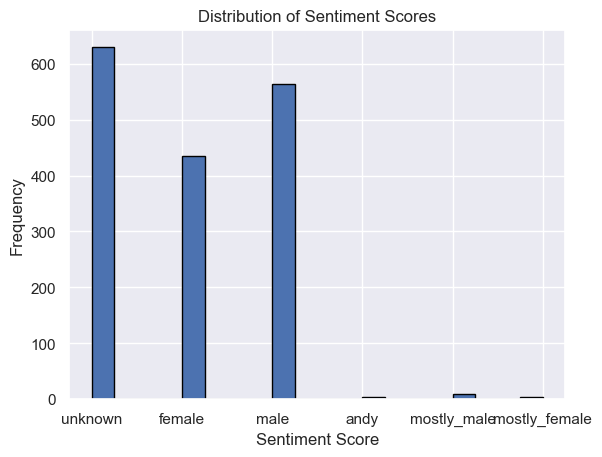

In [56]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'f' with a column 'Sent_Sc_P'
# Create a histogram of sentiment scores
plt.hist(f['gender'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


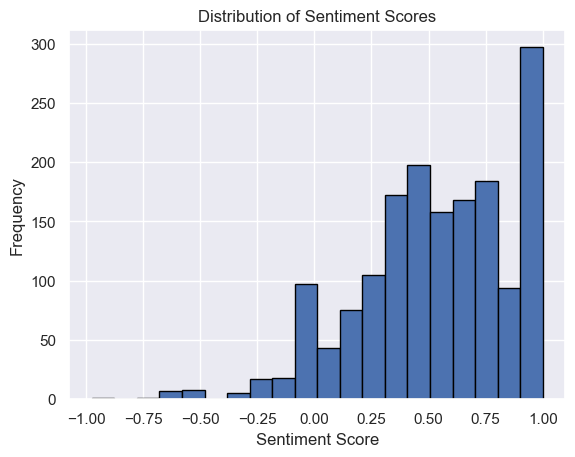

In [21]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'f' with a column 'Sent_Sc_P'
# Create a histogram of sentiment scores
plt.hist(f['Sentiment_Score'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


In [22]:
ml = f[["starRating", "cleaned_text", "Sentiment_Score"]]

In [23]:
ml.head()

,starRating,cleaned_text,Sentiment_Score
0,5,I'm there every beginning of the year I highly...,0.030000
1,5,Very beautiful and pleasant place. Breakfast a...,0.911111
2,5,One of the best canpings in the region,1.000000
3,5,Family place but I found things on site expens...,-0.500000
4,5,Great place! Affordable price and that's where...,1.000000


In [24]:
ml.loc[:, "word_count"] = ml["cleaned_text"].apply(lambda x: len(str(x).split(" ")))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/3453364577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.loc[:, "word_count"] = ml["cleaned_text"].apply(lambda x: len(str(x).split(" ")))


In [25]:
ml.tail()

,starRating,cleaned_text,Sentiment_Score,word_count
2783,5,Perfect infrastructure for camping and accommo...,0.583333,16
2786,5,Top,0.500000,1
2787,5,Delightful place!,1.000000,2
2789,5,Too good,0.700000,2
2792,5,"The group played paintball, a lot of fun.",0.300000,8


In [26]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

ml.loc[:, "avg_word"] = ml["cleaned_text"].apply(lambda x: avg_word(x))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/43500064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.loc[:, "avg_word"] = ml["cleaned_text"].apply(lambda x: avg_word(x))


In [27]:
ml.tail()

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word
2783,5,Perfect infrastructure for camping and accommo...,0.583333,16,6.5625
2786,5,Top,0.500000,1,3.0000
2787,5,Delightful place!,1.000000,2,8.0000
2789,5,Too good,0.700000,2,3.5000
2792,5,"The group played paintball, a lot of fun.",0.300000,8,4.2500


In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
ml['stopwords'] = ml["cleaned_text"].apply(lambda x: len([word for word in str(x).split() if word in stop]) if isinstance(x, str) else 0)


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/416350120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['stopwords'] = ml["cleaned_text"].apply(lambda x: len([word for word in str(x).split() if word in stop]) if isinstance(x, str) else 0)


In [31]:
ml.tail()

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word,stopwords
2783,5,Perfect infrastructure for camping and accommo...,0.583333,16,6.5625,6
2786,5,Top,0.500000,1,3.0000,0
2787,5,Delightful place!,1.000000,2,8.0000,0
2789,5,Too good,0.700000,2,3.5000,0
2792,5,"The group played paintball, a lot of fun.",0.300000,8,4.2500,2


In [32]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords dataset

stop = stopwords.words('english')  # Choose the language for stop words

# Function to remove stop words
def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop]
    return ' '.join(words)

# Apply the function to your DataFrame
ml['no_stopwords'] = ml['cleaned_text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/4207867580.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['no_stopwords'] = ml['cleaned_text'].apply(remove_stopwords)


In [33]:
ml.tail()

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word,stopwords,no_stopwords
2783,5,Perfect infrastructure for camping and accommo...,0.583333,16,6.5625,6,"Perfect infrastructure camping accommodation, ..."
2786,5,Top,0.500000,1,3.0000,0,Top
2787,5,Delightful place!,1.000000,2,8.0000,0,Delightful place!
2789,5,Too good,0.700000,2,3.5000,0,good
2792,5,"The group played paintball, a lot of fun.",0.300000,8,4.2500,2,"group played paintball, lot fun."


In [34]:
ml["lower"] = ml["no_stopwords"].str.lower()


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/3899530020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml["lower"] = ml["no_stopwords"].str.lower()


In [35]:
ml.tail()

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word,stopwords,no_stopwords,lower
2783,5,Perfect infrastructure for camping and accommo...,0.583333,16,6.5625,6,"Perfect infrastructure camping accommodation, ...","perfect infrastructure camping accommodation, ..."
2786,5,Top,0.500000,1,3.0000,0,Top,top
2787,5,Delightful place!,1.000000,2,8.0000,0,Delightful place!,delightful place!
2789,5,Too good,0.700000,2,3.5000,0,good,good
2792,5,"The group played paintball, a lot of fun.",0.300000,8,4.2500,2,"group played paintball, lot fun.","group played paintball, lot fun."


In [36]:
import re

# Assuming your DataFrame is named 'ml' with a column 'cleaned_text_lower'
ml['no_punct'] = ml['lower'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/883313916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['no_punct'] = ml['lower'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


In [37]:
ml.tail(3)

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word,stopwords,no_stopwords,lower,no_punct
2787,5,Delightful place!,1.0,2,8.00,0,Delightful place!,delightful place!,delightful place
2789,5,Too good,0.7,2,3.50,0,good,good,good
2792,5,"The group played paintball, a lot of fun.",0.3,8,4.25,2,"group played paintball, lot fun.","group played paintball, lot fun.",group played paintball lot fun


In [38]:
import emoji

# Assuming 'no_punct' is the column with text containing emojis
ml['no_emojis'] = ml['no_punct'].apply(lambda x: emoji.demojize(x))

# Now 'no_emojis' column will contain text with emojis replaced by their names


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/2406122718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['no_emojis'] = ml['no_punct'].apply(lambda x: emoji.demojize(x))


In [39]:
ml.tail(3)

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word,stopwords,no_stopwords,lower,no_punct,no_emojis
2787,5,Delightful place!,1.0,2,8.00,0,Delightful place!,delightful place!,delightful place,delightful place
2789,5,Too good,0.7,2,3.50,0,good,good,good,good
2792,5,"The group played paintball, a lot of fun.",0.3,8,4.25,2,"group played paintball, lot fun.","group played paintball, lot fun.",group played paintball lot fun,group played paintball lot fun


In [42]:
pip install --upgrade seaborn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf 

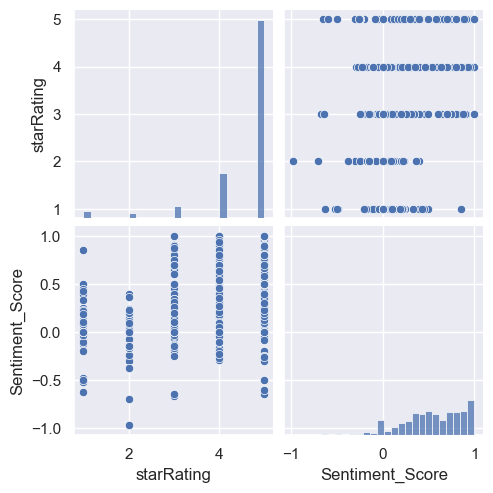

In [43]:
sns.pairplot(ml[["starRating", "Sentiment_Score"]])


MAYBE I SHOULD DO THE SENTIMENT ANALYSIS AFTER THE CLEANING

I WILL DO IT TOMORROW 

In [41]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 0 to 2792
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   starRating       1648 non-null   int64  
 1   cleaned_text     1648 non-null   object 
 2   Sentiment_Score  1648 non-null   float64
 3   word_count       1648 non-null   int64  
 4   avg_word         1648 non-null   float64
 5   stopwords        1648 non-null   int64  
 6   no_stopwords     1648 non-null   object 
 7   lower            1648 non-null   object 
 8   no_punct         1648 non-null   object 
 9   no_emojis        1648 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 141.6+ KB


In [81]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame and 'text_column' is the column with text data
texts = ml["no_emojis"].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Tokenize and convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure consistent length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Make predictions
predictions = model.predict(padded_sequences)

# Assuming a binary classification task, set a threshold (e.g., 0.5)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Add the predictions to your DataFrame
ml["predictions"] = binary_predictions


52/52 [==============================] - 0s 2ms/step


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1714/671641215.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml["predictions"] = binary_predictions


In [82]:
ml.tail()

,starRating,cleaned_text,Sentiment_Score,word_count,avg_word,stopwords,no_stopwords,lower,no_punct,no_emojis,predictions
2783,5,Perfect infrastructure for camping and accommo...,0.583333,16,6.5625,6,"Perfect infrastructure camping accommodation, ...","perfect infrastructure camping accommodation, ...",perfect infrastructure camping accommodation a...,perfect infrastructure camping accommodation a...,0
2786,5,Top,0.500000,1,3.0000,0,Top,top,top,top,0
2787,5,Delightful place!,1.000000,2,8.0000,0,Delightful place!,delightful place!,delightful place,delightful place,0
2789,5,Too good,0.700000,2,3.5000,0,good,good,good,good,0
2792,5,"The group played paintball, a lot of fun.",0.300000,8,4.2500,2,"group played paintball, lot fun.","group played paintball, lot fun.",group played paintball lot fun,group played paintball lot fun,0


In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data and sentiment analysis labels
texts = ml["no_emojis"].tolist()
sentiment_labels = ml["Sentiment_Score"].tolist()  # Replace "sentiment_column" with the actual column name in your DataFrame

# Convert sentiment labels to binary format
# For example, consider "positive" as 1 and merge "neutral" and "negative" as 0
binary_labels = np.array([1 if sentiment == "positive" else 0 for sentiment in sentiment_labels])

# Tokenize and convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

from sklearn.model_selection import train_test_split

# Assuming X contains your features (padded_sequences) and y contains your labels (binary_labels)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, binary_labels, test_size=0.2, random_state=42)


# Dummy embedding matrix (replace this with your pre-trained embeddings)
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.random.rand(vocab_size, embedding_dim)

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, binary_labels, epochs=10, batch_size=1)


Epoch 1/10
1648/1648 [==============================] - 1s 660us/step - loss: 8.9804e-04 - accuracy: 0.9994
Epoch 2/10
1648/1648 [==============================] - 1s 635us/step - loss: 1.1390e-08 - accuracy: 1.0000
Epoch 3/10
1648/1648 [==============================] - 1s 634us/step - loss: 3.1780e-09 - accuracy: 1.0000
Epoch 4/10
1648/1648 [==============================] - 1s 637us/step - loss: 1.2491e-09 - accuracy: 1.0000
Epoch 5/10
1648/1648 [==============================] - 1s 629us/step - loss: 5.6333e-10 - accuracy: 1.0000
Epoch 6/10
1648/1648 [==============================] - 1s 626us/step - loss: 2.7274e-10 - accuracy: 1.0000
Epoch 7/10
1648/1648 [==============================] - 1s 684us/step - loss: 1.4088e-10 - accuracy: 1.0000
Epoch 8/10
1648/1648 [==============================] - 1s 703us/step - loss: 7.8598e-11 - accuracy: 1.0000
Epoch 9/10
1648/1648 [==============================] - 1s 648us/step - loss: 4.8005e-11 - accuracy: 1.0000
Epoch 10/10
1648/1648 [=====

In [84]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 0 to 2792
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   starRating       1648 non-null   int64  
 1   cleaned_text     1648 non-null   object 
 2   Sentiment_Score  1648 non-null   float64
 3   word_count       1648 non-null   int64  
 4   avg_word         1648 non-null   float64
 5   stopwords        1648 non-null   int64  
 6   no_stopwords     1648 non-null   object 
 7   lower            1648 non-null   object 
 8   no_punct         1648 non-null   object 
 9   no_emojis        1648 non-null   object 
 10  predictions      1648 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 154.5+ KB
